In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [1]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
dataset_dir = tf.keras.utils.get_file('flower_photos', origin=_URL, untar=True)
data_dir = os.path.join(os.path.dirname(dataset_dir), 'flower_photos')


NameError: name 'tf' is not defined

In [5]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3669 files belonging to 5 classes.
Using 2936 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3669 files belonging to 5 classes.
Using 733 files for validation.


In [7]:
# Class names for the dataset
class_names = train_ds.class_names
print(f"Class names: {class_names}")

Class names: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [6]:
# Configure dataset performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                   img_width,
                                   3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

c:\Users\Dan\PycharmProjects\vseznaika\.venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
normalization_layer = layers.Rescaling(1./255)

# Build the model
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])


In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 26s 268ms/step - accuracy: 0.3425 - loss: 1.7653 - val_accuracy: 0.4366 - val_loss: 1.5075
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 202ms/step - accuracy: 0.5822 - loss: 1.0533 - val_accuracy: 0.6235 - val_loss: 1.0048
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 204ms/step - accuracy: 0.6017 - loss: 0.9862 - val_accuracy: 0.6194 - val_loss: 0.9696
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 205ms/step - accuracy: 0.6440 - loss: 0.8961 - val_accuracy: 0.6903 - val_loss: 0.8527
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 207ms/step - accuracy: 0.6927 - loss: 0.7943 - val_accuracy: 0.7012 - val_loss: 0.8269
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 208ms/step - accuracy: 0.7171 - loss: 0.7422 - val_accuracy: 0.7040 - val_loss: 0.7629
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 208ms/step - accuracy: 0.7297 - loss: 0.7061 - val_accuracy: 0.7135 - val_loss: 0.7636
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 210ms/step - accuracy: 0.7252 - loss: 0.6826 - val_accu

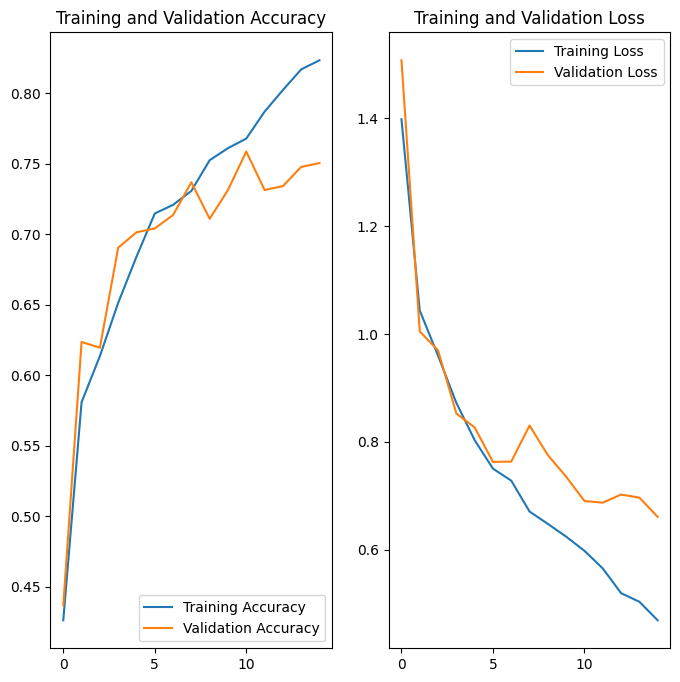

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [12]:
model.save('final_model.keras')